In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from hist import Hist

import plotting
from sample_labels import sig_key, data_key


In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
file = uproot.open("cards/bdtcut_0.986_bbcut_0.976_bblite/fitDiagnosticsBlindedBkgOnly.root")


In [5]:
file.keys()


['shapes_prefit;1',
 'shapes_prefit/failBlinded;1',
 'shapes_prefit/failBlinded/data;1',
 'shapes_prefit/failBlinded/ggHH_kl_1_kt_1_hbbhww4q;1',
 'shapes_prefit/failBlinded/ttbar;1',
 'shapes_prefit/failBlinded/bbWW_boosted_ggf_qcd_datadriven;1',
 'shapes_prefit/failBlinded/total;1',
 'shapes_prefit/failBlinded/total_signal;1',
 'shapes_prefit/failBlinded/total_background;1',
 'shapes_prefit/failBlinded/total_covar;1',
 'shapes_prefit/fail;1',
 'shapes_prefit/fail/data;1',
 'shapes_prefit/fail/ggHH_kl_1_kt_1_hbbhww4q;1',
 'shapes_prefit/fail/ttbar;1',
 'shapes_prefit/fail/bbWW_boosted_ggf_qcd_datadriven;1',
 'shapes_prefit/fail/total;1',
 'shapes_prefit/fail/total_signal;1',
 'shapes_prefit/fail/total_background;1',
 'shapes_prefit/fail/total_covar;1',
 'shapes_prefit/passCat1Blinded;1',
 'shapes_prefit/passCat1Blinded/data;1',
 'shapes_prefit/passCat1Blinded/bbWW_boosted_ggf_qcd_datadriven;1',
 'shapes_prefit/passCat1Blinded/ggHH_kl_1_kt_1_hbbhww4q;1',
 'shapes_prefit/passCat1Blinded/

In [6]:
hist_label_map = {
    "data": data_key,
    "bbWW_boosted_ggf_qcd_datadriven": "QCD",
    "ttbar": "TT",
    "ggHH_kl_1_kt_1_hbbhww4q": "HHbbVV",
}

hist_label_map_inverse = {val: key for key, val in hist_label_map.items()}
samples = list(hist_label_map.values())


In [7]:
# bb msd is final shape var
shape_var = ("bbFatJetMsd", r"$m^{bb}$ (GeV)")
shape_bins = [20, 50, 250]  # num bins, min, max
blind_window = [100, 150]
regions = {"fail": "Fail", "passCat1": "Pass Cat1"}
shapes = {
    "shapes_prefit": "Pre-Fit",
    "shapes_fit_s": "S+B Post-Fit",
    "shapes_fit_b": "B-only Post-Fit",
}


In [9]:
hists = {}
data_errs = {}

for shape in shapes:
    hists[shape] = {
        region: Hist.new.StrCat(samples, name="Sample")
        .Reg(*shape_bins, name=shape_var[0], label=shape_var[1])
        .Double()
        for region in regions
    }

    data_errs[shape] = {}

    for region in regions:
        h = hists[shape][region]
        for key, file_key in hist_label_map_inverse.items():
            if key != data_key:
                data_key_index = np.where(np.array(list(h.axes[0])) == key)[0][0]
                h.view(flow=False)[data_key_index] = file[shape][region][file_key].values() * 10

        data_key_index = np.where(np.array(list(h.axes[0])) == data_key)[0][0]
        h.view(flow=False)[data_key_index] = file[shape][region]["data"].values()[1] * 10

        data_errs[shape][region] = np.stack(
            (
                file[shape][region]["data"].errors(which="low")[1] * 10,
                file[shape][region]["data"].errors(which="high")[1] * 10,
            )
        )
    

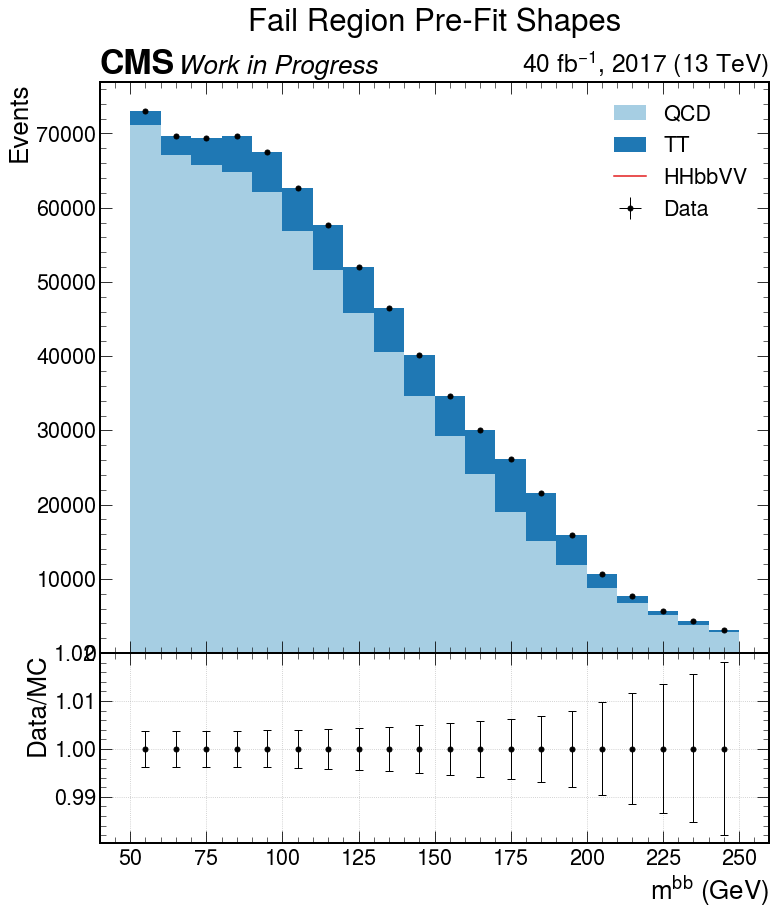

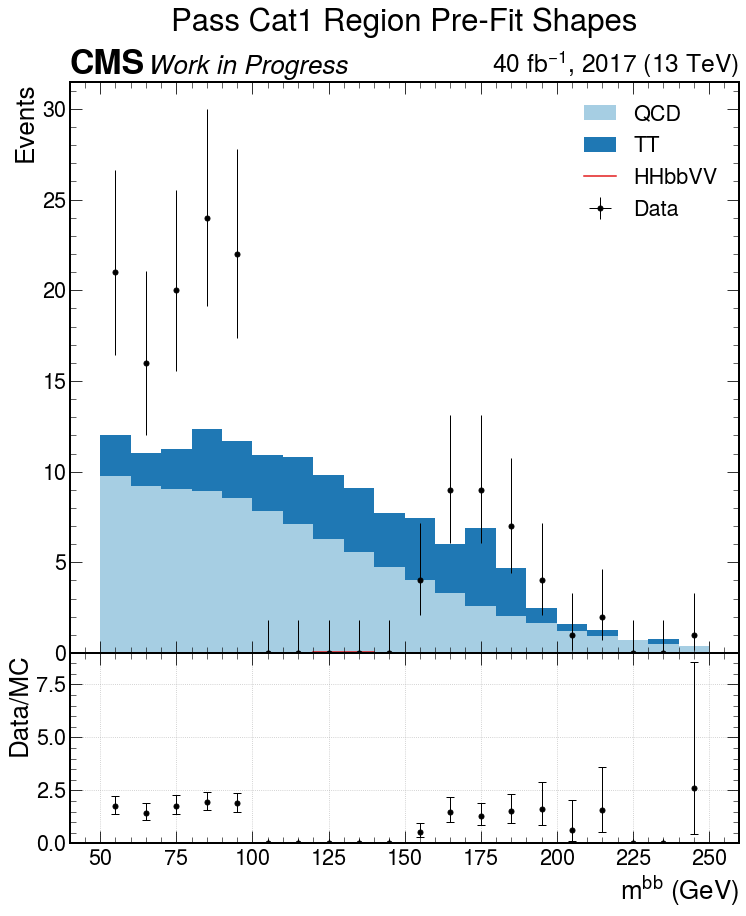

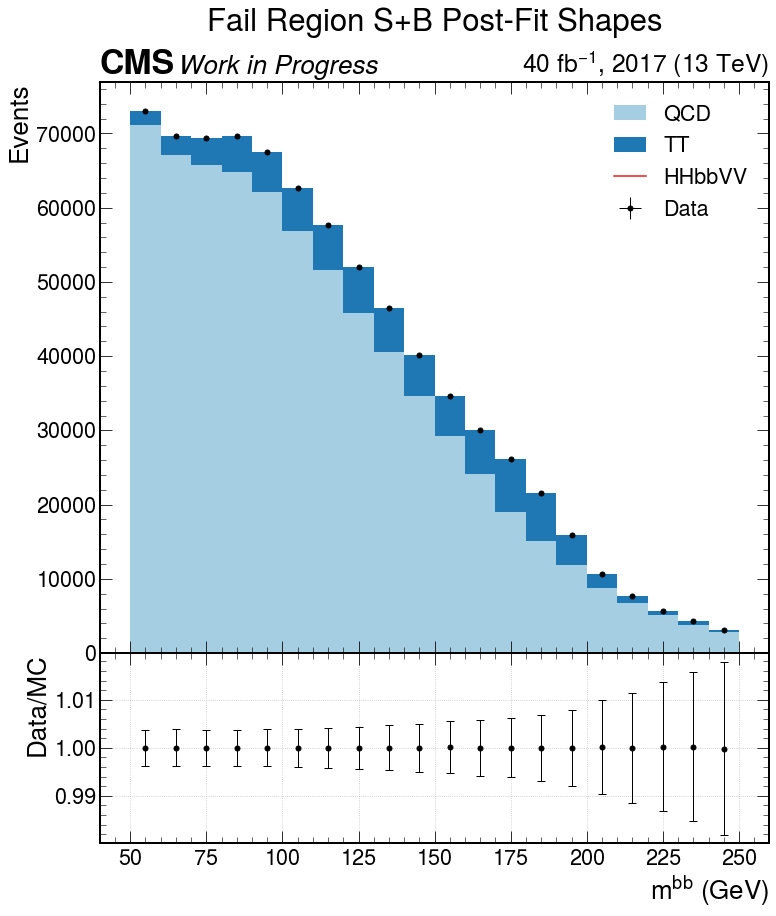

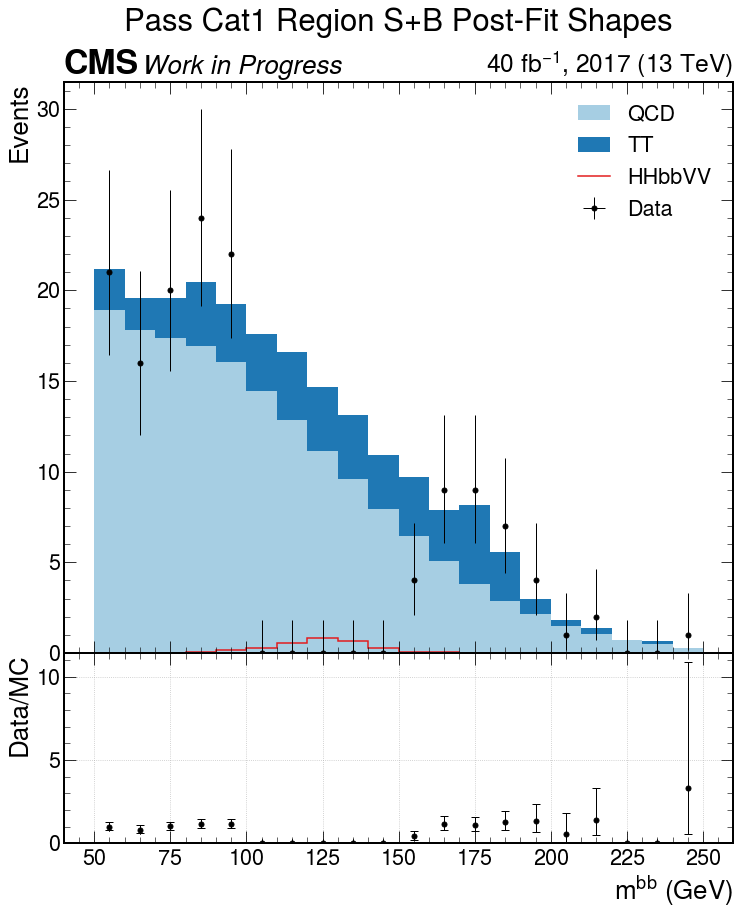

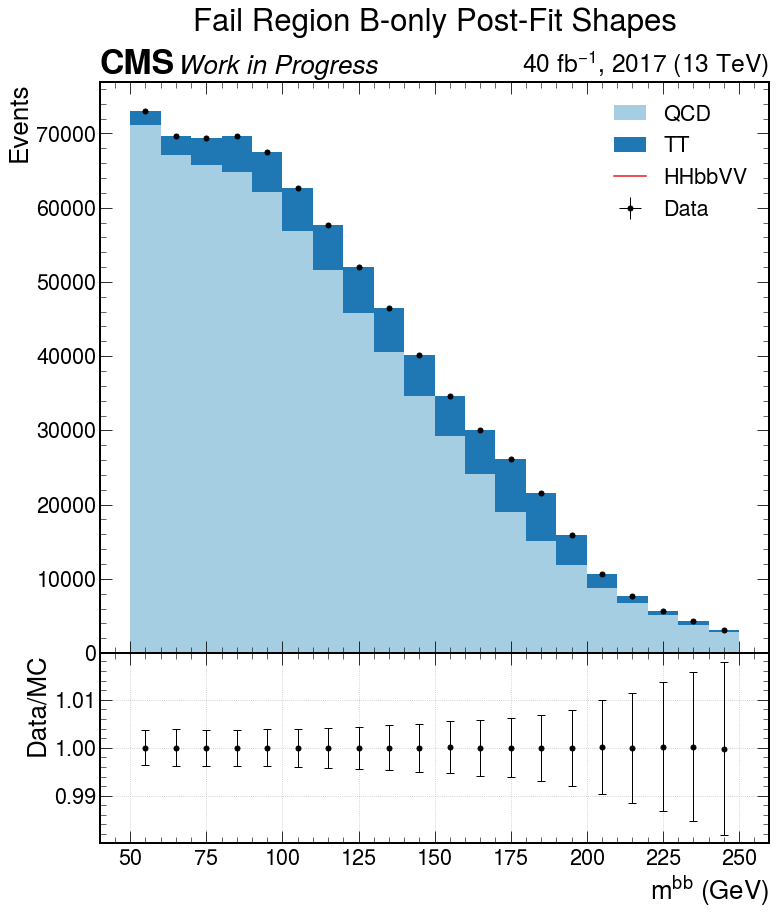

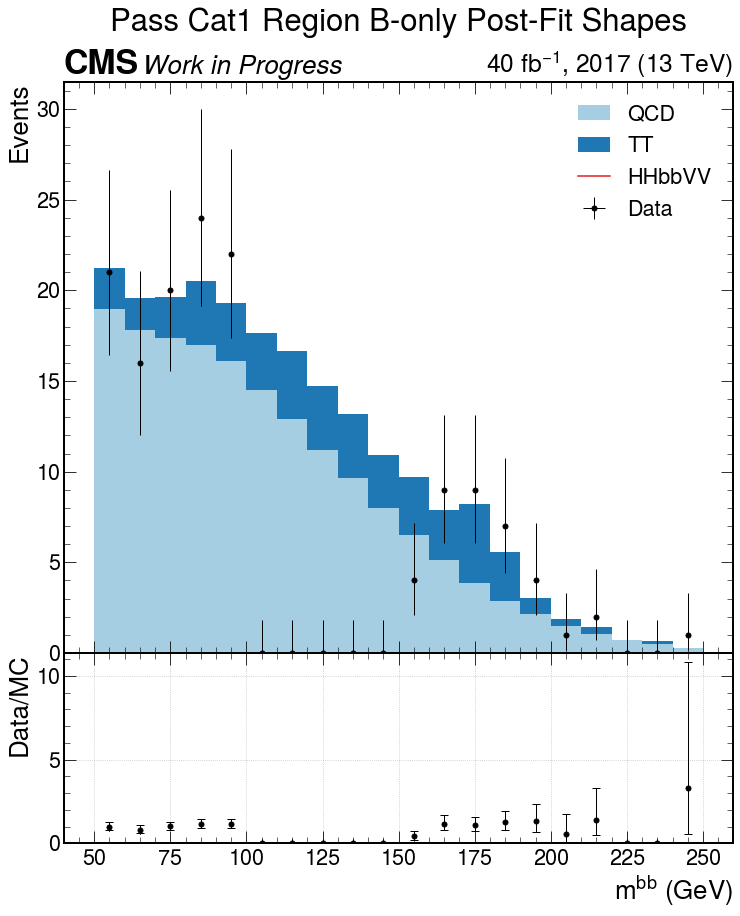

In [28]:
for shape, slabel in shapes.items():
    for region, rlabel in regions.items():
        plotting.ratioHistPlot(
            hists[shape][region],
            ["QCD", "TT"],
            data_err=data_errs[shape][region],
            title=f"{rlabel} Region {slabel} Shapes",
        )
